# Урок 2.  
# Масштабирование признаков.  
# L1- и L2-регуляризация.  
# Стохастический градиентный спуск

На этом уроке мы продолжим исследовать линейные модели,  
узначем, зачем для линейных моделей нужно масштабировать признаки,  
реализуем свою линейную регрессию с регуляризацией  
и усовршенствуем наш алгоритм градиентного спуска, сделав его стохастическим.  
Поехали!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]]).T

In [36]:
y = np.array([45, 55, 50, 59, 65, 35, 75, 80, 50, 60])
y.shape

(10,)

# Виды масштабирования признаков

![img/normalization.png](img/normalization.png)

### MinMaxScaler  

$$\large X_{norm} = \frac{X – X_{min}}{X_{max}-X_{min}}$$

In [4]:
X[:,1].min(), X[:,1].max()

(0, 10)

In [5]:
X[:,2].min(), X[:,2].max()

(450, 2000)

In [6]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 1.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [8]:
X_norm[:,1] = (X[:,1] - X[:,1].min()) / (X[:,1].max() - X[:,1].min())
X_norm

array([[1.00e+00, 1.00e-01, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e-01, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e-01, 7.50e+02, 2.00e+00],
       [1.00e+00, 1.00e-01, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e-01, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e-01, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e-01, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e-01, 1.00e+03, 2.00e+00]])

In [9]:
X_norm[:,2] = (X[:,2] - X[:,2].min()) / (X[:,2].max() - X[:,2].min())
X_norm

array([[1.        , 0.1       , 0.03225806, 1.        ],
       [1.        , 0.1       , 0.16129032, 1.        ],
       [1.        , 0.2       , 0.19354839, 2.        ],
       [1.        , 0.1       , 0.09677419, 1.        ],
       [1.        , 0.3       , 0.64516129, 2.        ],
       [1.        , 0.        , 0.22580645, 1.        ],
       [1.        , 0.5       , 0.67741935, 3.        ],
       [1.        , 1.        , 1.        , 3.        ],
       [1.        , 0.1       , 0.        , 1.        ],
       [1.        , 0.2       , 0.35483871, 2.        ]])

### Стандартизация  

$$\large X_{norm} = \frac{X – X_{mean}}{std}$$

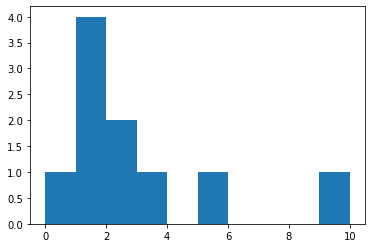

In [10]:
plt.hist(X[:,1]);

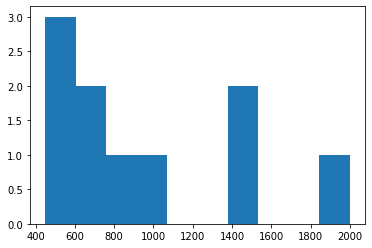

In [11]:
plt.hist(X[:,2]);

In [12]:
X1_mean = X[:,1].mean()
X1_mean

2.6

In [13]:
X1_std = X[:,1].std()
X1_std

2.8000000000000003

In [14]:
X_st = X.copy().astype(np.float64)

In [15]:
X_st[:,1] = (X[:,1] - X1_mean) / X1_std
X_st

array([[ 1.00000000e+00, -5.71428571e-01,  5.00000000e+02,
         1.00000000e+00],
       [ 1.00000000e+00, -5.71428571e-01,  7.00000000e+02,
         1.00000000e+00],
       [ 1.00000000e+00, -2.14285714e-01,  7.50000000e+02,
         2.00000000e+00],
       [ 1.00000000e+00, -5.71428571e-01,  6.00000000e+02,
         1.00000000e+00],
       [ 1.00000000e+00,  1.42857143e-01,  1.45000000e+03,
         2.00000000e+00],
       [ 1.00000000e+00, -9.28571429e-01,  8.00000000e+02,
         1.00000000e+00],
       [ 1.00000000e+00,  8.57142857e-01,  1.50000000e+03,
         3.00000000e+00],
       [ 1.00000000e+00,  2.64285714e+00,  2.00000000e+03,
         3.00000000e+00],
       [ 1.00000000e+00, -5.71428571e-01,  4.50000000e+02,
         1.00000000e+00],
       [ 1.00000000e+00, -2.14285714e-01,  1.00000000e+03,
         2.00000000e+00]])

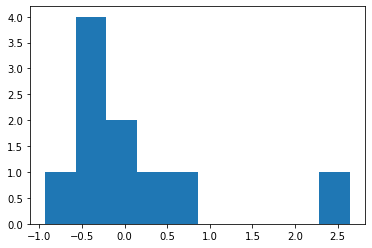

In [16]:
plt.hist(X_st[:,1]);

In [17]:
def custom_StandardScaler(x):
    res = (x - x.mean()) / x.std()
    return res

In [18]:
X_st[:,2] = custom_StandardScaler(X[:,2])

In [19]:
X_st[:,3] = custom_StandardScaler(X[:,3])
X_st

array([[ 1.        , -0.57142857, -0.97958969, -0.89625816],
       [ 1.        , -0.57142857, -0.56713087, -0.89625816],
       [ 1.        , -0.21428571, -0.46401617,  0.38411064],
       [ 1.        , -0.57142857, -0.77336028, -0.89625816],
       [ 1.        ,  0.14285714,  0.97958969,  0.38411064],
       [ 1.        , -0.92857143, -0.36090146, -0.89625816],
       [ 1.        ,  0.85714286,  1.08270439,  1.66447944],
       [ 1.        ,  2.64285714,  2.11385144,  1.66447944],
       [ 1.        , -0.57142857, -1.08270439, -0.89625816],
       [ 1.        , -0.21428571,  0.05155735,  0.38411064]])

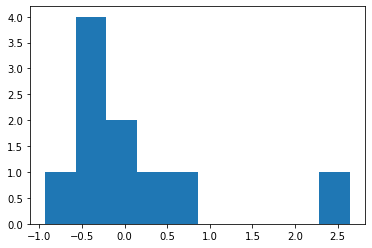

In [20]:
plt.hist(X_st[:,1]);

# SGD

![img/lr_gradient_descent.gif](img/lr_gradient_descent.gif)

Как нейронные сети обучаются с помощью градиентного спуска:  
https://www.youtube.com/watch?v=IHZwWFHWa-w

In [21]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [50]:
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations+1):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X)))
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [53]:
eval_model(X_st, y, iterations=1000, alpha=1e-2)

# итерация: 100, MSE: 98.25681699856932, веса: [49.95330289  4.40609311  3.61496398  3.56993317]
# итерация: 200, MSE: 41.302931924516386, веса: [56.41242234  4.72776275  3.27181789  3.64385348]
# итерация: 300, MSE: 40.148635027642925, веса: [57.26902789  4.97688304  2.97086159  3.69962193]
# итерация: 400, MSE: 40.022891598435585, веса: [57.38263054  5.18017728  2.71875663  3.75161461]
# итерация: 500, MSE: 39.947717688766396, веса: [57.39769647  5.34640409  2.5076725   3.79915277]
# итерация: 600, MSE: 39.89583721876253, веса: [57.39969451  5.48254857  2.33098081  3.84195689]
# итерация: 700, MSE: 39.85985054064494, веса: [57.39995949  5.594229    2.18311259  3.88004307]
# итерация: 800, MSE: 39.83486216631381, веса: [57.39999463  5.6859753   2.05939199  3.91361303]
# итерация: 900, MSE: 39.81749709357478, веса: [57.39999929  5.76144832  1.95589518  3.9429771 ]
# итерация: 1000, MSE: 39.80542186736652, веса: [57.39999991  5.82361324  1.86933108  3.9685014 ]


array([57.39999991,  5.82361324,  1.86933108,  3.9685014 ])

In [58]:
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
            X_tmp = X[start_ : end_, :]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(X_tmp, W)
            err = calc_mse(y_tmp, y_pred_tmp)
            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp)))
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [59]:
eval_sgd_model(X_st, y, iterations=5000, qty_in_batch=5, alpha=1e-2)

# итерация: 500, MSE: 40.27711754104662, веса: [57.39646904  5.15995219  2.40614133  4.11681248]
# итерация: 1000, MSE: 39.2404055989874, веса: [57.3981871   5.80094178  1.82902364  4.05664146]
# итерация: 1500, MSE: 38.711864242648105, веса: [57.39793933  6.0182402   1.58842387  4.08190607]
# итерация: 2000, MSE: 38.465676497029555, веса: [57.39784744  6.0960034   1.48923793  4.1042351 ]
# итерация: 2500, MSE: 38.35747576742156, веса: [57.39781227  6.12502485  1.44861446  4.1162315 ]
# итерация: 3000, MSE: 38.31148465560014, веса: [57.39779851  6.13618457  1.43203987  4.12181287]
# итерация: 3500, MSE: 38.29230701805241, веса: [57.39779306  6.14056279  1.42529264  4.12425101]
# итерация: 4000, MSE: 38.28439886404941, веса: [57.39779087  6.14230277  1.42254966  4.12528244]
# итерация: 4500, MSE: 38.2811591649375, веса: [57.39778999  6.14299987  1.42143545  4.12571118]
# итерация: 5000, MSE: 38.2798371303515, веса: [57.39778964  6.14328055  1.42098306  4.12588763]


array([57.39778964,  6.14328055,  1.42098306,  4.12588763])

### Регуляризация  

По сути, регуляризация - это ограничение модели.  
Для нас это, прежде всего, способ уменьшить сложность модели, чтобы предотвратить переобучение.
Проблема: признаки могут иметь линейную (или почти линейную) зависимость.  
Если у нас есть такие признаки, модель будет не устойчива к изменению в данных (большой variance).  
Чтобы побороть этот эффект, модель при обучении дополнительно ограничивают, используя **регуляризацию**.

Подробнее здесь:  
https://habr.com/ru/company/ods/blog/323890/  
и здесь:  
https://habr.com/ru/company/ods/blog/322076/  

L1 регуляризация

$$\Large \mathcal{L}_{reg} \left(X, \vec{y}, \vec{w}\right) = \mathcal{L}\left(X, \vec{y}, \vec{w}\right)  + \lambda \sum_{j=1}^m \left| w_j \right|$$

L2 регуляризация

$$\Large \mathcal{L}_{reg} \left(X, \vec{y}, \vec{w}\right) = \mathcal{L}\left(X, \vec{y}, \vec{w}\right) + \lambda \frac{1}{2} \sum_{j=1}^m w_j^2$$

In [60]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations+1):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X) + lambda_ * W) 
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [61]:
eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

# итерация: 500, MSE: 39.98166412253416, веса: [57.39479705  5.10767868  2.46037345  4.08674902]
# итерация: 1000, MSE: 39.80723120406398, веса: [57.39713005  5.765859    1.85689028  4.03893236]
# итерация: 1500, MSE: 39.782405042800356, веса: [57.39713014  5.99060723  1.60529698  4.06885866]
# итерация: 2000, MSE: 39.77852356578891, веса: [57.39713014  6.07152025  1.50155606  4.09300748]
# итерация: 2500, MSE: 39.77788748617127, веса: [57.39713014  6.10185559  1.45905205  4.10572941]
# итерация: 3000, MSE: 39.777779304702605, веса: [57.39713014  6.11355928  1.44170275  4.11160375]
# итерация: 3500, MSE: 39.77775983405892, веса: [57.39713014  6.11816175  1.43463681  4.11416107]
# итерация: 4000, MSE: 39.77775594321603, веса: [57.39713014  6.11999396  1.43176283  4.1152412 ]
# итерация: 4500, MSE: 39.77775502451415, веса: [57.39713014  6.12072893  1.43059479  4.11568989]
# итерация: 5000, MSE: 39.777754760507705, веса: [57.39713014  6.12102515  1.4301203   4.11587451]


array([57.39713014,  6.12102515,  1.4301203 ,  4.11587451])

### Домашнее задание:  
1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).
2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?  
3. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации *.

#### 1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

In [27]:
lambda_arr = np.logspace(-10, 0, 20)
lambda_arr

array([1.00000000e-10, 3.35981829e-10, 1.12883789e-09, 3.79269019e-09,
       1.27427499e-08, 4.28133240e-08, 1.43844989e-07, 4.83293024e-07,
       1.62377674e-06, 5.45559478e-06, 1.83298071e-05, 6.15848211e-05,
       2.06913808e-04, 6.95192796e-04, 2.33572147e-03, 7.84759970e-03,
       2.63665090e-02, 8.85866790e-02, 2.97635144e-01, 1.00000000e+00])

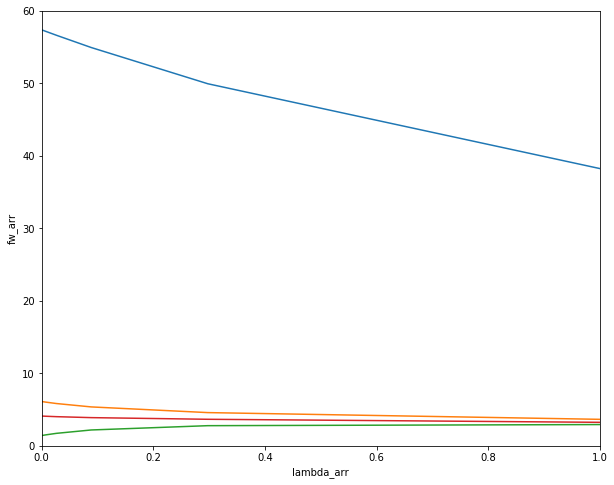

In [34]:
w_arr = []

for lmbd in lambda_arr:
    w = eval_model_reg2(X_st, y, iterations=7500, alpha=1e-2, lambda_=lmbd)
    w_arr.append(w)
w_arr = np.array(w_arr)

for i in range(len(w_arr[0])):
    plt.plot(lambda_arr, w_arr[:, i])

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 15
plt.rcParams["figure.figsize"] = fig_size
plt.xlabel('lambda_arr')
plt.ylabel('fw_arr')
plt.ylim(0, 60)
plt.xlim(0, 1)
plt.show()

#### 2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?  

Можно, но нет смысла.

#### 3. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации *.  

Детальный вывод производной: https://www.youtube.com/watch?v=dHhYHGI9E6I

In [47]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8, vebrose=False):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W/np.abs(W))
        if vebrose:
            if i % (iterations / 10) == 0:
                print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [48]:
eval_model_reg1(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4, vebrose=True)

# итерация: 500, MSE: 39.9815492692797, веса: [57.3976156   5.1079242   2.46011903  4.08691798]
# итерация: 1000, MSE: 39.80712300604174, веса: [57.3999499   5.76651203  1.85620907  4.03912572]
# итерация: 1500, MSE: 39.78234087113101, веса: [57.39995     5.99151699  1.60431305  4.06910179]
# итерация: 2000, MSE: 39.77848915615645, веса: [57.39995     6.07256443  1.50039558  4.09329499]
# итерация: 2500, MSE: 39.77786776237368, веса: [57.39995     6.10296578  1.45779797  4.10604572]
# итерация: 3000, MSE: 39.7777660764615, веса: [57.39995     6.11470092  1.44040178  4.11193613]
# итерация: 3500, MSE: 39.777749346503995, веса: [57.39995    6.1193181  1.4333132  4.1145017]
# итерация: 4000, MSE: 39.77774658745511, веса: [57.39995     6.12115708  1.43042856  4.11558584]
# итерация: 4500, MSE: 39.77774613157808, веса: [57.39995     6.12189515  1.42925561  4.11603642]
# итерация: 5000, MSE: 39.77774605600939, веса: [57.39995     6.12219276  1.42877888  4.11622191]


array([57.39995   ,  6.12219276,  1.42877888,  4.11622191])